In [86]:
import torch.nn as nn
import torch
import torch.utils.data as Data
from  sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
def getdata():
    train_data=load_iris()
    data=train_data['data']
    labels=train_data['target'].reshape(-1,1)
    total_data=np.hstack((data,labels))
    np.random.shuffle(total_data)
    train=total_data[0:120,:-1]
    test=total_data[120:,:-1]
    train_label=total_data[0:120,-1].reshape(-1,1)
    test_label=total_data[120:,-1].reshape(-1,1)
    return data,labels,train,test,train_label,test_label
data,labels,train,test,train_label,test_label = getdata()
# 数据预处理 归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train=scaler.transform(train)
# 4.对测试数据进行归一化处理
test=scaler.transform(test)


In [87]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=7)
# 6.训练数据
knn_clf.fit(train,train_label)
# 7.进行比较
y_pred = knn_clf.predict(test)
y_true=test_label.reshape(1,-1)[0]
accuracy = float((y_pred == y_true).astype(int).sum()) / (len(y_true))
score=knn_clf.score(test,test_label)#这样可以直接算准确率
print(score)
print(accuracy)

0.9666666666666667
0.9666666666666667


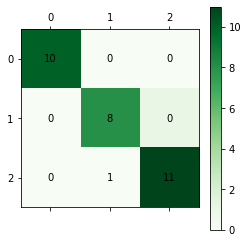

In [88]:
# 衡量模型性能

#true↓ predict→
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_pred, y_true)
#print(cm)
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')

In [89]:
# 分类报告
r = sm.classification_report(y_true, y_pred)
print('分类报告为：', r, sep='\n')

分类报告为：
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.89      1.00      0.94         8
         2.0       1.00      0.92      0.96        12

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



0.9533333333333335
0.9533333333333334
0.9666666666666666
0.9733333333333334
0.9800000000000001
0.9666666666666668
0.9600000000000002
0.9466666666666667
评估最合适的K值为：7 其准确率为：0.98


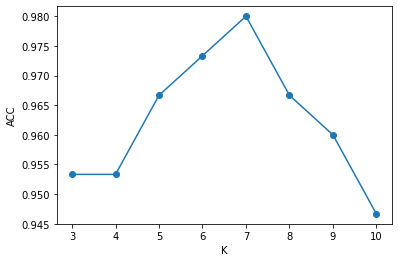

In [71]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
iris = datasets.load_iris()
# X 为特征集，y 为标签集
X= train
y=train_label
fs =[3,4,5,6,7,8,9,10]
# 进行4折交叉验证，返回的是训练集和验证集的下标
fk = KFold(n_splits=4, shuffle=True)

# 先默认当前最好的k值
best_k = fs[0]
# 先默认最好的准确率值
best_score = 0

ACC = []
K = []

# 遍历所有的候选值
for k in fs:

    curr_score = 0
    # 遍历5段的数据集
    for train_index,valid_index in fk.split(X):
        # 实例化KNN模型
        clf = KNeighborsClassifier(n_neighbors=k)
        # 训练模型
        clf.fit(X[train_index], y[train_index])
        # 计算当前的准确率
        curr_score = curr_score + clf.score(X[valid_index], y[valid_index])
    # 计算KNN模型的K值为k时的平均准确率值
    avg_score = curr_score/4
    K.append(k)
    ACC.append(avg_score)
    print(avg_score)
    # 判断平均准确率值是否大于目前最好的准确率值
    if avg_score > best_score:
        # 将平均准确率值替代原先最好的准确率值
        best_score = avg_score
        # 将目前的K值替换原先最好的K值
        best_k = k

print('评估最合适的K值为：%d'%best_k,"其准确率为：%.2f"%best_score)


plt.xlabel('K')
plt.ylabel('ACC')
plt.plot(K,ACC,'o-')
plt.show()
